In [115]:
import sys
import os
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dropout, Flatten, Dense, Activation
from tensorflow.python.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.python.keras import backend as K

### Lo que sigue a continuación es el entrenamiento de la red, tienen que ejecutarlo para que se creen el archivo modelo y peso dentro de la carpeta modelo que son necesarios para lo que sigue despues, tarda bastante en ejecutarse porque tiene que entrenar un modelo, 20 veces

In [2]:
#K.clear_session()

#data_entrenamiento = './data/entrenamiento'
#data_validacion = "./data/validacion"

#epocas = 20
#altura, longitud = 100, 100
#batch_size = 32
#pasos = 1000
#pasos_validacion = 200
#filtrosConv1 = 32
#filtrosConv2 = 64
#tamano_filtro1 = (3,3)
#tamano_filtro2 = (2,2)
#tamano_pool = (2,2)
#clases = 3
#lr = 0.0005

#entrenamiento_datagen = ImageDataGenerator(
#    rescale = 1./255,
#    shear_range = 0.3,
#    zoom_range = 0.3,
#    horizontal_flip = True
#)

#validacion_datagen = ImageDataGenerator(
#    rescale = 1./255
#)

#imagen_entrenamiento =  entrenamiento_datagen.flow_from_directory(
#    data_entrenamiento,
#    target_size = (altura, longitud),
#    batch_size = batch_size,
#    class_mode = 'categorical'
#)

#imagen_validacion =  validacion_datagen.flow_from_directory(
#    data_validacion,
#    target_size = (altura, longitud),
#    batch_size = batch_size,
#    class_mode = 'categorical'
#)

#cnn = Sequential()
#cnn.add(Convolution2D(filtrosConv1, tamano_filtro1, padding='same', input_shape = (altura, longitud, 3), activation = 'relu'))

#cnn.add(MaxPooling2D(pool_size=tamano_pool))
#cnn.add(Convolution2D(filtrosConv2, tamano_filtro2, padding='same'))
#cnn.add(MaxPooling2D(pool_size=tamano_pool))

#cnn.add(Flatten())
#cnn.add(Dense(256, activation = 'relu'))
#cnn.add(Dropout(0.5))
#cnn.add(Dense(clases, activation = 'softmax'))

#cnn.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=lr), metrics=['accuracy'])

#cnn.fit(imagen_entrenamiento, steps_per_epoch=pasos, epochs=epocas, validation_data=imagen_validacion, validation_steps= pasos_validacion)

#dir = './modelo/'

#if not os.path.exists(dir):
#    os.mkdir(dir)
#cnn.save('./modelo/modelo.h5')
#cnn.save_weights('./modelo/pesos.h5')

Found 90 images belonging to 3 classes.
Found 90 images belonging to 3 classes.
Epoch 1/20
1000/1000 [==============================] - 917s 917ms/step - loss: 0.0487 - acc: 0.9841 - val_loss: 2.8846e-04 - val_acc: 1.0000
Epoch 2/20
1000/1000 [==============================] - 907s 907ms/step - loss: 0.0069 - acc: 0.9980 - val_loss: 3.5650e-06 - val_acc: 1.0000
Epoch 3/20
1000/1000 [==============================] - 900s 900ms/step - loss: 8.9487e-05 - acc: 1.0000 - val_loss: 1.5499e-06 - val_acc: 1.0000
Epoch 4/20
1000/1000 [==============================] - 897s 897ms/step - loss: 0.0175 - acc: 0.9957 - val_loss: 3.2292e-06 - val_acc: 1.0000
Epoch 5/20
1000/1000 [==============================] - 896s 896ms/step - loss: 2.1185e-04 - acc: 0.9999 - val_loss: 2.0967e-07 - val_acc: 1.0000
Epoch 6/20
1000/1000 [==============================] - 897s 897ms/step - loss: 0.0055 - acc: 0.9984 - val_loss: 2.1366e-07 - val_acc: 1.0000
Epoch 7/20
1000/1000 [==============================] - 894s

In [116]:
import numpy as np

In [117]:
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.models import load_model

In [118]:
longitud, altura = 100,100
modelo = './modelo/modelo.h5'
pesos = './modelo/pesos.h5'
cnn = load_model(modelo)
cnn.load_weights(pesos)

In [119]:
def predecir(file):
    x= load_img(file, target_size=(longitud, altura))
    x= img_to_array(x)
    x= np.expand_dims(x, axis=0)
    arreglo= cnn.predict(x)
    resultado= arreglo[0]
    respuesta= np.argmax(resultado)
    if respuesta == 0:
        print('La foto corresponde al jugador Mbappe')
    elif respuesta == 1:
        print('La foto corresponde al jugador Messi')
    elif respuesta == 2:
        print('La foto corresponde al jugador Ronaldo')

In [148]:
from IPython.display import Image

### Test con foto de Messi

La foto corresponde al jugador Messi


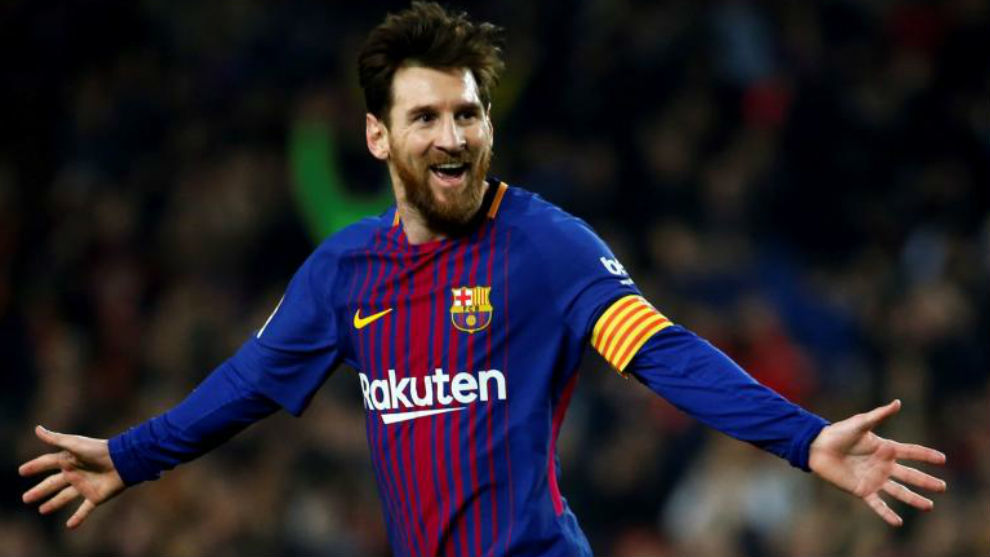

In [149]:
predecir( 'prueba/1.jpg')
Image(filename= 'prueba/1.jpg', width=125, height=125)

### Test con foto de Mbappe

La foto corresponde al jugador Mbappe


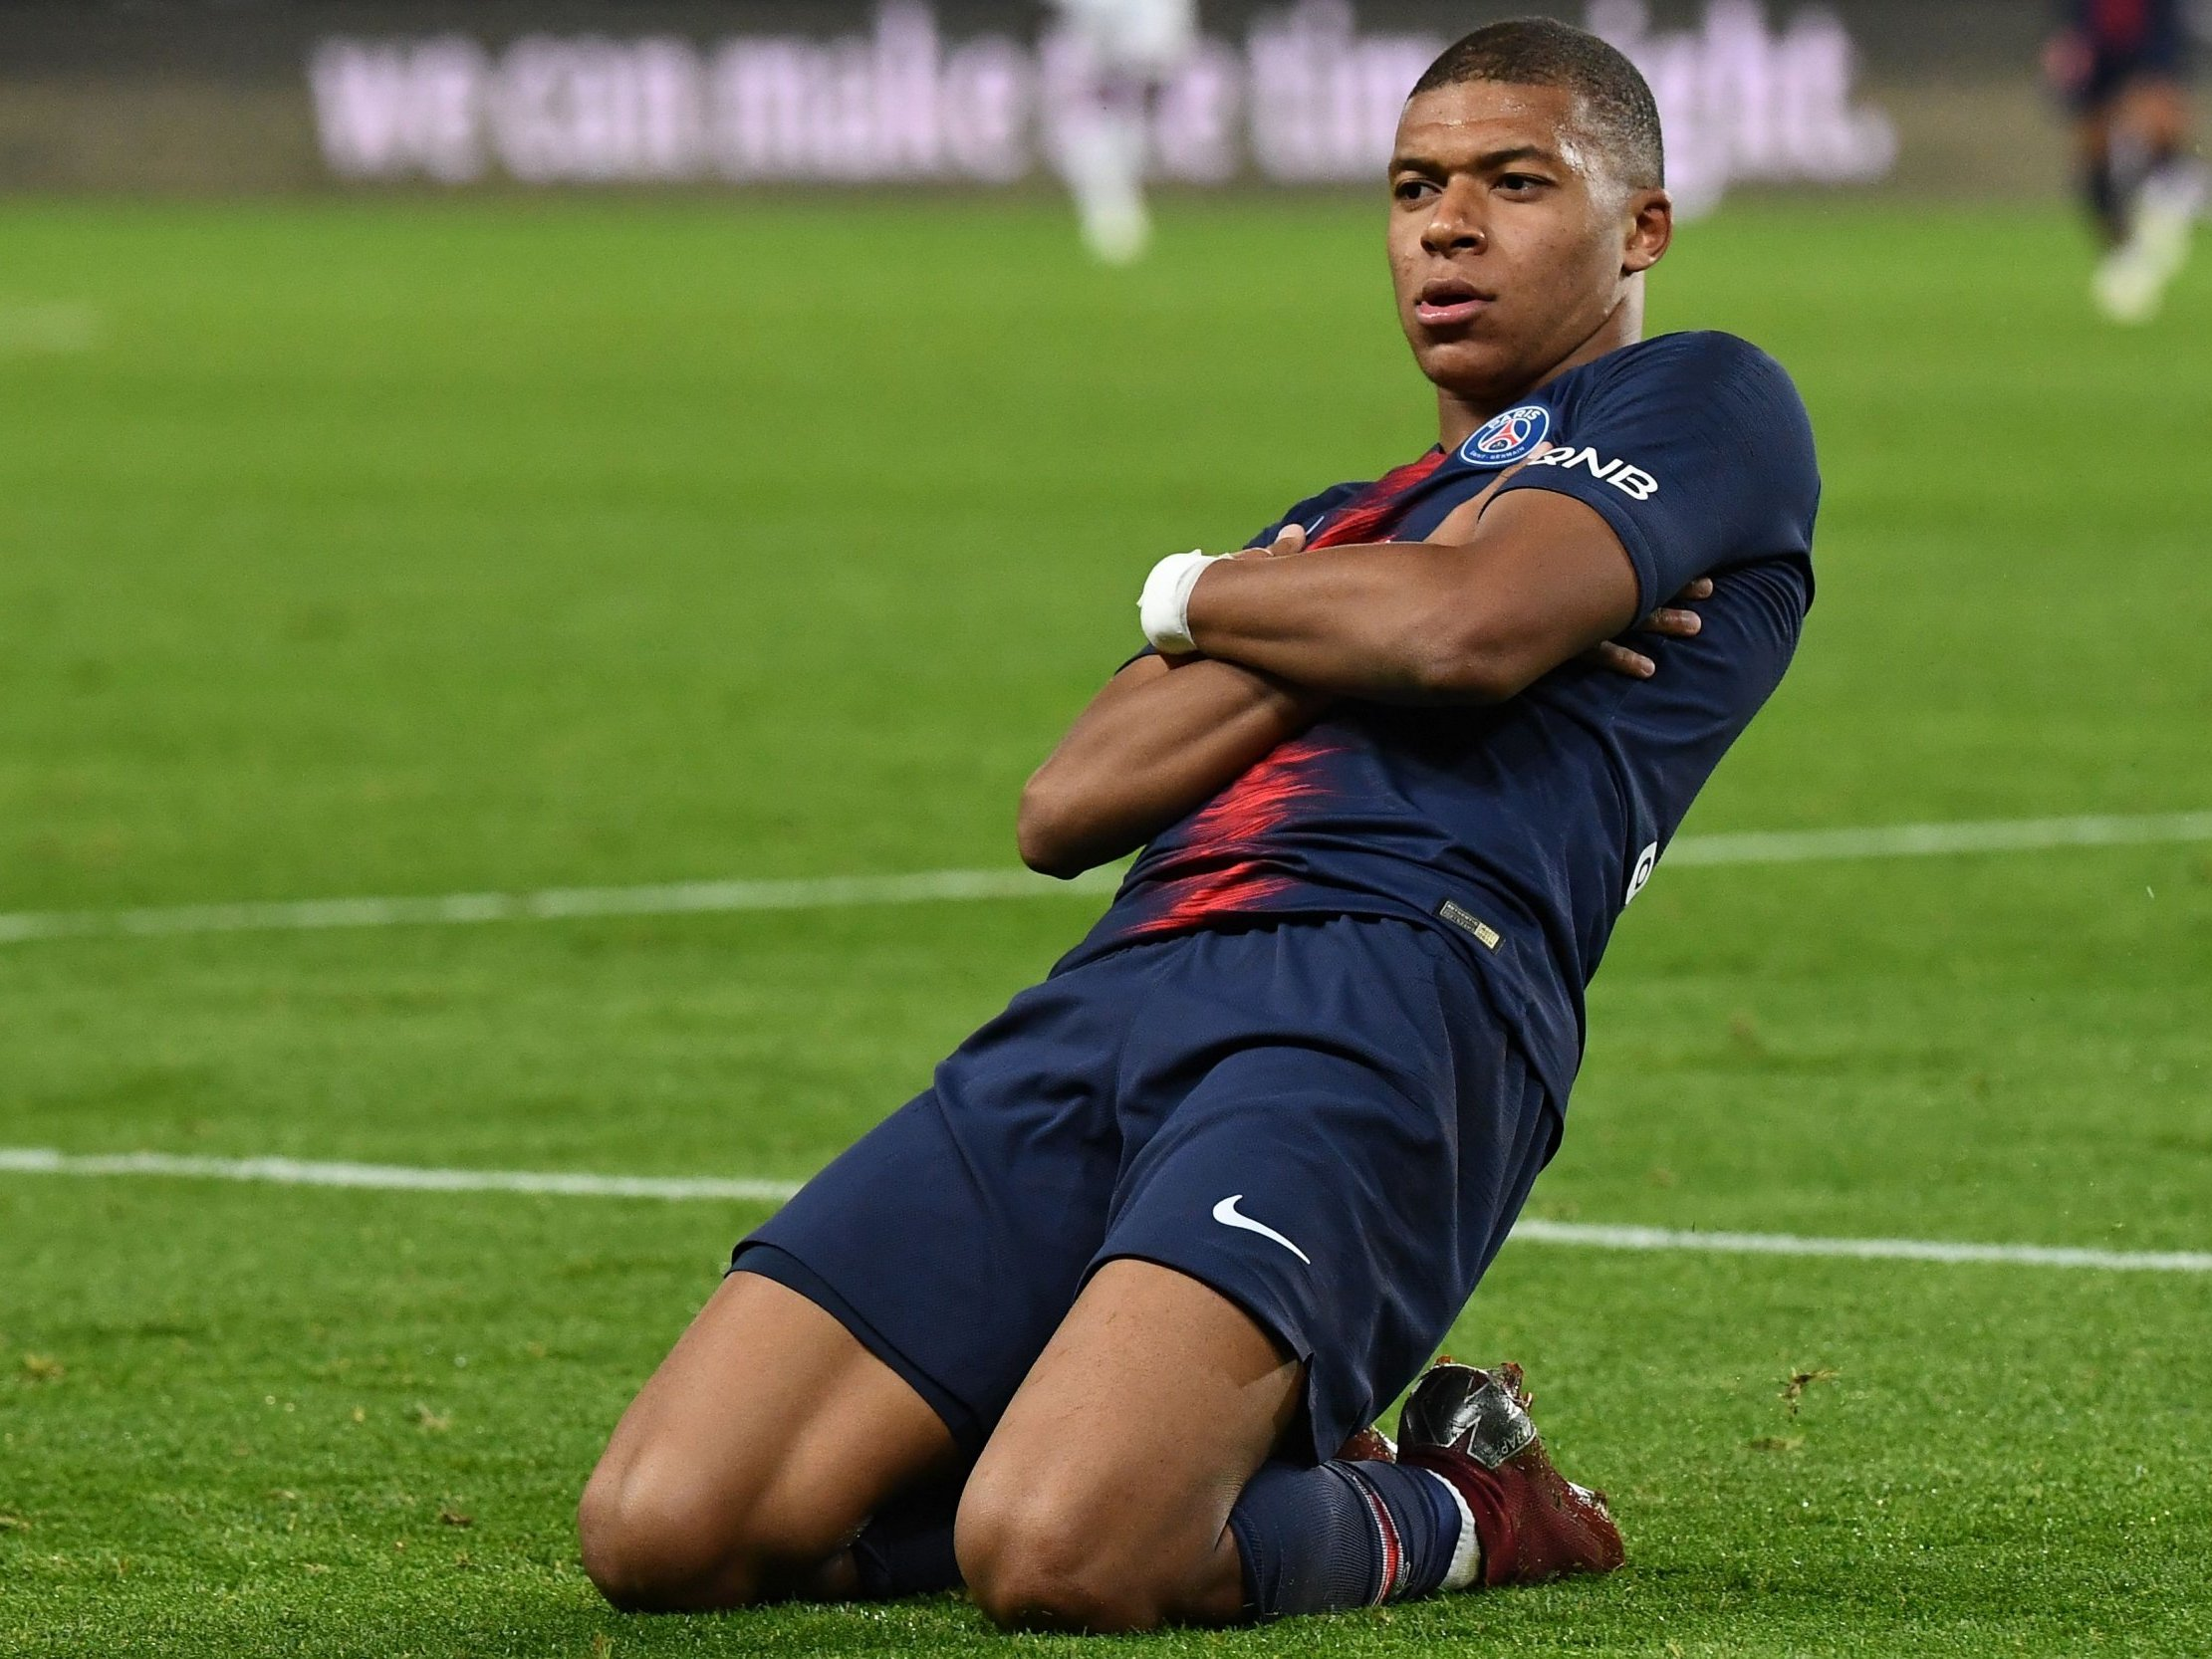

In [150]:
predecir( 'prueba/2.jpg')
Image(filename= 'prueba/2.jpg', width=125, height=125)

### Test con foto de Ronaldo

La foto corresponde al jugador Ronaldo


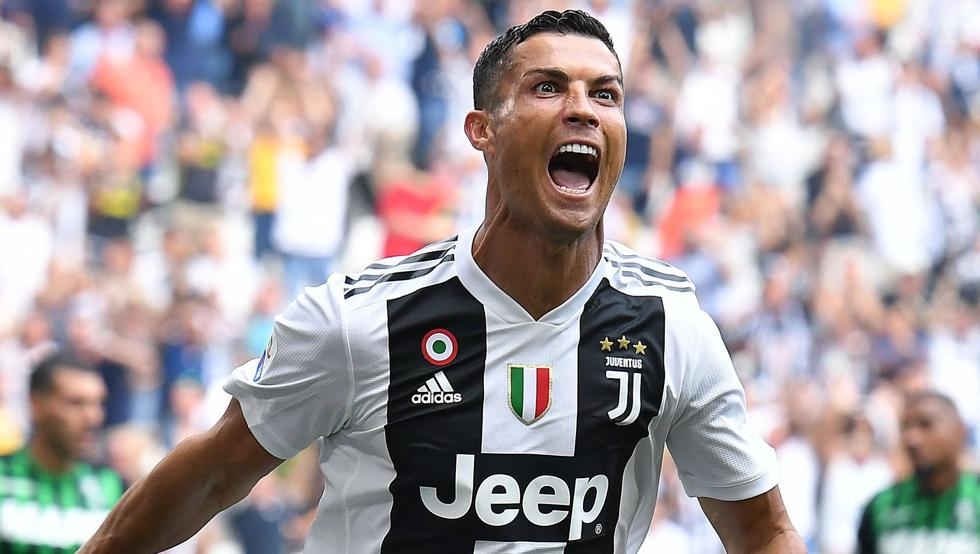

In [151]:
predecir( 'prueba/3.jpg')
Image(filename= 'prueba/3.jpg', width=125, height=125)

### Test con foto de Ronaldo antes de la fama

La foto corresponde al jugador Ronaldo


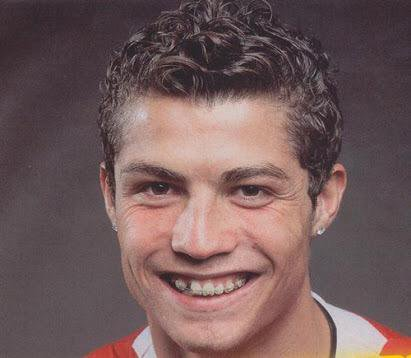

In [152]:
predecir( 'prueba/4.jpg')
Image(filename= 'prueba/4.jpg', width=125, height=125)

### Para ver el ejemplo solamente ejecutar estas dos lineas y ver el video

In [3]:
from IPython.display import HTML

In [4]:
%%HTML
<video width="900" height="600" controls>
  <source src="videoTest/clasificador.mp4" type="video/mp4">
</video>